In [80]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(tidyverse)
library(lubridate)
library(forcats)
library(gridExtra)
library(reshape2)

In [81]:
data<-read.csv("Life Expectancy Data.csv")

In [82]:
head(data)

Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [83]:
colnames(data)

[1] "Country"                         "Year"                           
 [3] "Status"                          "Life.expectancy"                
 [5] "Adult.Mortality"                 "infant.deaths"                  
 [7] "Alcohol"                         "percentage.expenditure"         
 [9] "Hepatitis.B"                     "Measles"                        
[11] "BMI"                             "under.five.deaths"              
[13] "Polio"                           "Total.expenditure"              
[15] "Diphtheria"                      "HIV.AIDS"                       
[17] "GDP"                             "Population"                     
[19] "thinness..1.19.years"            "thinness.5.9.years"             
[21] "Income.composition.of.resources" "Schooling"

In [84]:
summary(data)

                Country          Year             Status     Life.expectancy
 Afghanistan        :  16   Min.   :2000   Developed : 512   Min.   :36.30  
 Albania            :  16   1st Qu.:2004   Developing:2426   1st Qu.:63.10  
 Algeria            :  16   Median :2008                     Median :72.10  
 Angola             :  16   Mean   :2008                     Mean   :69.22  
 Antigua and Barbuda:  16   3rd Qu.:2012                     3rd Qu.:75.70  
 Argentina          :  16   Max.   :2015                     Max.   :89.00  
 (Other)            :2842                                    NA's   :10     
 Adult.Mortality infant.deaths       Alcohol        percentage.expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:

In [85]:
colSums(is.na(data))

Country                            Year 
                              0                               0 
                         Status                 Life.expectancy 
                              0                              10 
                Adult.Mortality                   infant.deaths 
                             10                               0 
                        Alcohol          percentage.expenditure 
                            194                               0 
                    Hepatitis.B                         Measles 
                            553                               0 
                            BMI               under.five.deaths 
                             34                               0 
                          Polio               Total.expenditure 
                             19                             226 
                     Diphtheria                        HIV.AIDS 
                             19                               0 
                            GDP                      Population 
                            448                             652 
           thinness..1.19.years              thinness.5.9.years 
                             34                              34 
Income.composition.of.resources                       Schooling 
                            167                             163

In [86]:
data <- data %>% 
    drop_na() %>%
    rename('lifeexp'='Life.expectancy',
          'totexp'='percentage.expenditure',
          'perc.exp'='Total.expenditure',
          'admort'='Adult.Mortality',
          'infmort'='infant.deaths',
          'u5deaths'='under.five.deaths',
          'HBV'='Hepatitis.B',
          'HIV'='HIV.AIDS') %>%
    filter(!is.na(lifeexp), !is.na(admort), !is.na(infmort))
head(data)

Country,Year,Status,lifeexp,admort,infmort,Alcohol,totexp,HBV,Measles,...,Polio,perc.exp,Diphtheria,HIV,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


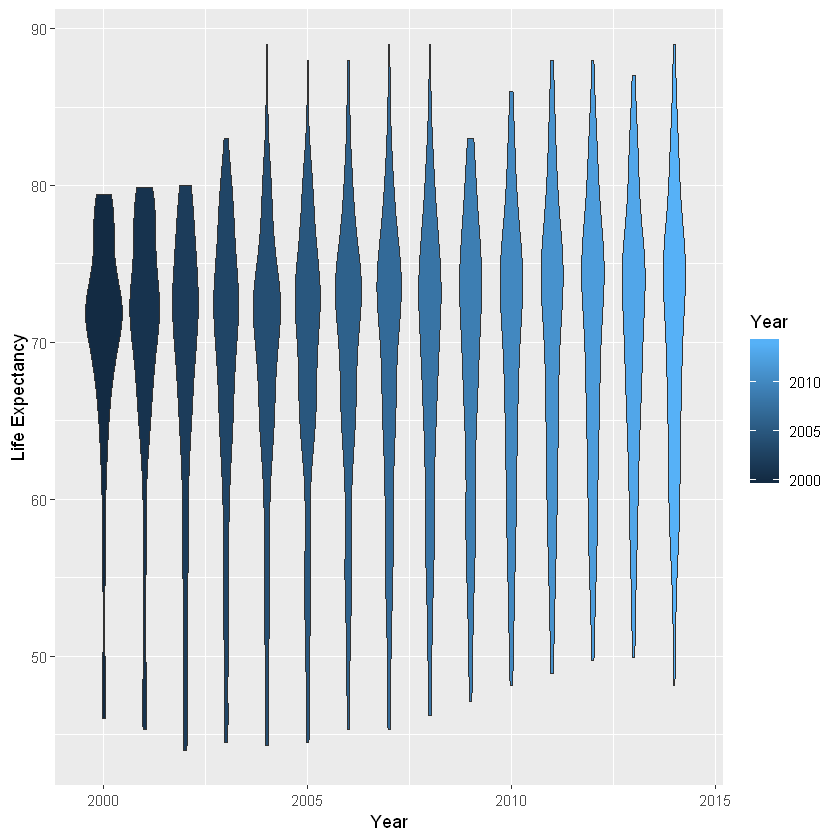

In [87]:
data %>%
ggplot()+
        geom_violin(aes(x=Year, y=lifeexp, group=Year, fill=Year))+
        ylab("Life Expectancy")


In [88]:
#Overview of difference between Developed and Developing countries
by_status<-data %>% 
    group_by(Status) %>% 
    summarize(Count = n(),
             avg_lifeexp = mean(lifeexp, na.rm=TRUE),
             avg_infmort = mean(infmort, na.rm=TRUE),
             avg_admort = mean(admort, na.rm=TRUE),
             avg_BMI = mean(BMI, na.rm=TRUE),
             avg_GDP = mean(GDP, na.rm=TRUE))
by_status

`summarise()` ungrouping output (override with `.groups` argument)


Status,Count,avg_lifeexp,avg_infmort,avg_admort,avg_BMI,avg_GDP
Developed,242,78.69174,0.8719008,84.19008,52.33678,18976.932
Developing,1407,67.68735,38.0021322,182.66738,35.68486,3259.395


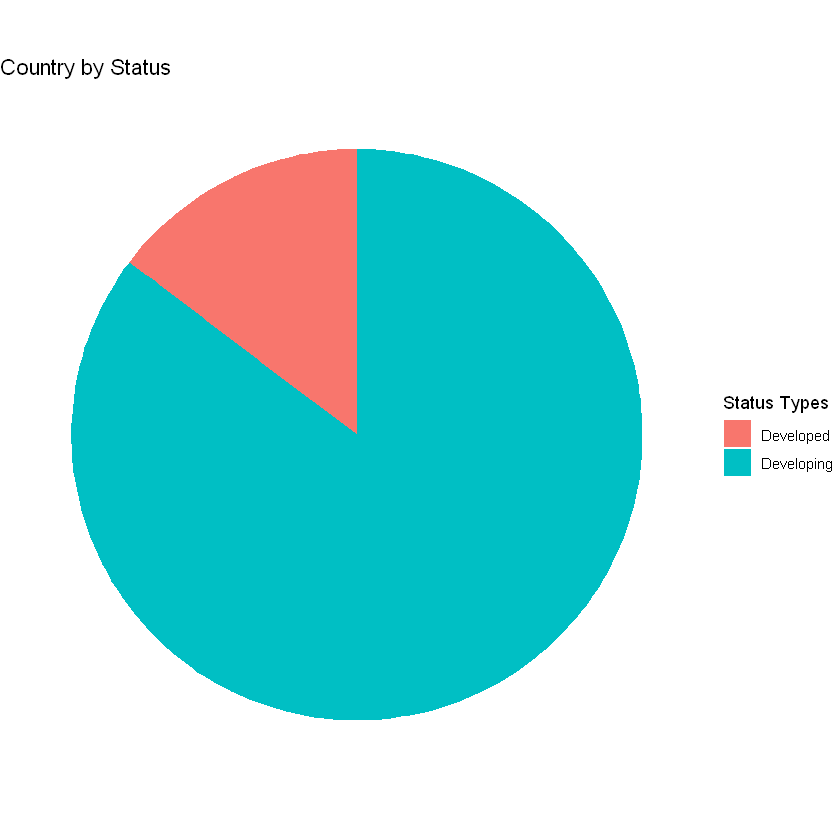

In [89]:
ggplot(by_status,aes(x="", y=Count, fill=Status))+
  geom_bar(width = 1,stat = "identity")+
  coord_polar("y", start=0)+ 
  theme(plot.title = element_text(vjust = 0.5))+
  ggtitle("Country by Status")+
  labs(fill = "Status Types")+
  theme_void()

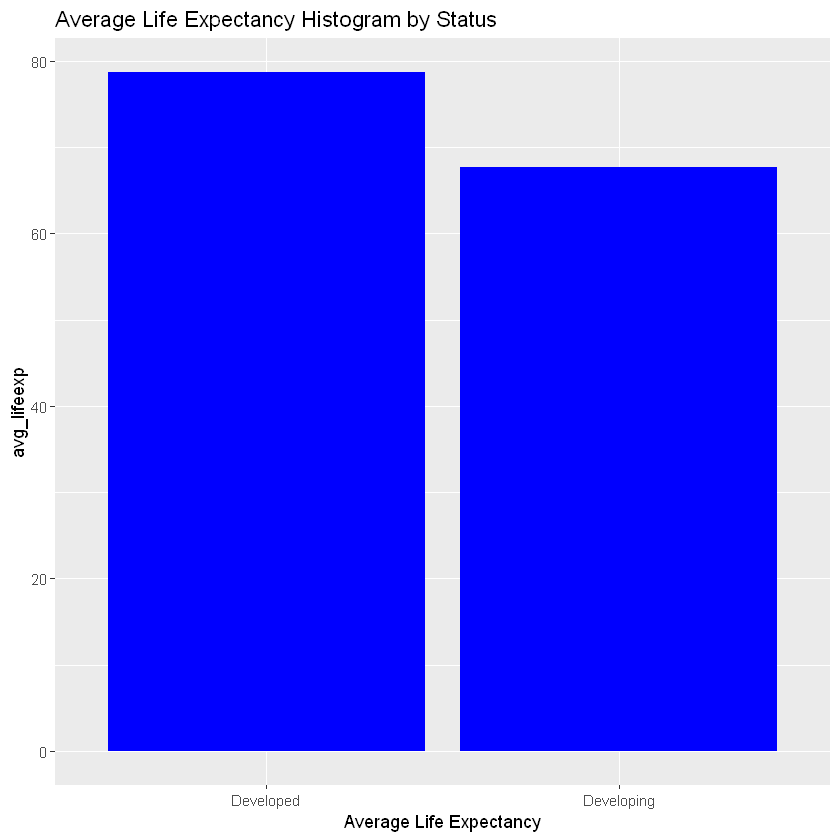

In [90]:
ggplot(by_status,aes(y=avg_lifeexp,x=Status))+geom_col(fill="blue")+
    ggtitle("Average Life Expectancy Histogram by Status")+xlab("Average Life Expectancy")

In [91]:
colnames(data)

[1] "Country"                         "Year"                           
 [3] "Status"                          "lifeexp"                        
 [5] "admort"                          "infmort"                        
 [7] "Alcohol"                         "totexp"                         
 [9] "HBV"                             "Measles"                        
[11] "BMI"                             "u5deaths"                       
[13] "Polio"                           "perc.exp"                       
[15] "Diphtheria"                      "HIV"                            
[17] "GDP"                             "Population"                     
[19] "thinness..1.19.years"            "thinness.5.9.years"             
[21] "Income.composition.of.resources" "Schooling"

In [92]:
by_country<-data%>%group_by(Country)%>%summarize(avg_GDP=mean(GDP,na.rm=TRUE),
            avg_lifeexp=mean(lifeexp,na.rm=TRUE),
            avg_infmort = mean(infmort, na.rm=TRUE),
            avg_admort = mean(admort, na.rm=TRUE),
            avg_Alcohol = mean(Alcohol,na.rm=TRUE),
            avg_perc.exp = mean(perc.exp,na.rm=TRUE),
            avg_HBV = mean(HBV,na.rm=TRUE),                                     
            avg_Measles = mean(Measles,na.rm=TRUE),                                                        
            avg_BMI = mean(BMI, na.rm=TRUE),
            avg_u5deaths = mean(u5deaths,na.rm=TRUE),                                     
            avg_Polio = mean(Polio,na.rm=TRUE),                                     
            avg_totexp = mean(totexp,na.rm=TRUE),
            avg_Diphtheria = mean(Diphtheria,na.rm=TRUE),                                     
            avg_HIV = mean(HIV,na.rm=TRUE),                                                                         
            avg_GDP = mean(GDP, na.rm=TRUE),
            avg_Population = mean(Population,na.rm=TRUE),                                     
            avg_thinness..1.19.years = mean(thinness..1.19.years,na.rm=TRUE),                                     
            avg_thinness.5.9.years = mean(thinness.5.9.years,na.rm=TRUE),                                     
            avg_Income.composition.of.resources = mean(Income.composition.of.resources,na.rm=TRUE),                                     
            avg_Schooling = mean(Schooling,na.rm=TRUE))
head(by_country)

`summarise()` ungrouping output (override with `.groups` argument)


Country,avg_GDP,avg_lifeexp,avg_infmort,avg_admort,avg_Alcohol,avg_perc.exp,avg_HBV,avg_Measles,avg_BMI,avg_u5deaths,avg_Polio,avg_totexp,avg_Diphtheria,avg_HIV,avg_Population,avg_thinness..1.19.years,avg_thinness.5.9.years,avg_Income.composition.of.resources,avg_Schooling
Afghanistan,340.0154,58.19375,78.25000,269.0625,0.0143750,8.252500,64.56250,2362.2500,15.51875,107.56250,48.37500,34.96011,52.31250,0.10,9972259.8,16.581250,15.5812500,0.4153750,8.21250
Albania,2119.7267,75.15625,0.68750,45.0625,4.8487500,5.945625,98.00000,53.3750,49.06875,0.93750,98.12500,193.25909,98.06250,0.10,696911.6,1.618750,1.7000000,0.7098750,12.13750
Algeria,3261.2894,74.20909,20.27273,102.8182,0.4472727,4.945455,76.45455,647.0000,48.87273,23.36364,93.18182,300.27194,93.36364,0.10,24124739.3,6.000000,5.8909091,0.7071818,13.16364
Angola,2935.7630,50.67500,76.62500,362.7500,7.6200000,3.653750,71.00000,3925.6250,18.45000,118.75000,70.87500,174.40579,64.00000,2.45,10107848.4,9.037500,8.9250000,0.4928750,9.47500
Argentina,6932.5469,75.23846,10.00000,100.3846,8.0046154,6.546154,80.30769,2.0000,54.48462,11.23077,94.46154,838.19889,93.69231,0.10,20847453.5,1.061538,0.9307692,0.7957692,16.63077
Armenia,2108.6751,73.30667,1.00000,117.3333,3.7026667,4.861333,87.13333,290.3333,44.02667,1.00000,88.66667,139.74125,86.93333,0.10,1063395.9,2.033333,2.1066667,0.6955333,11.72667


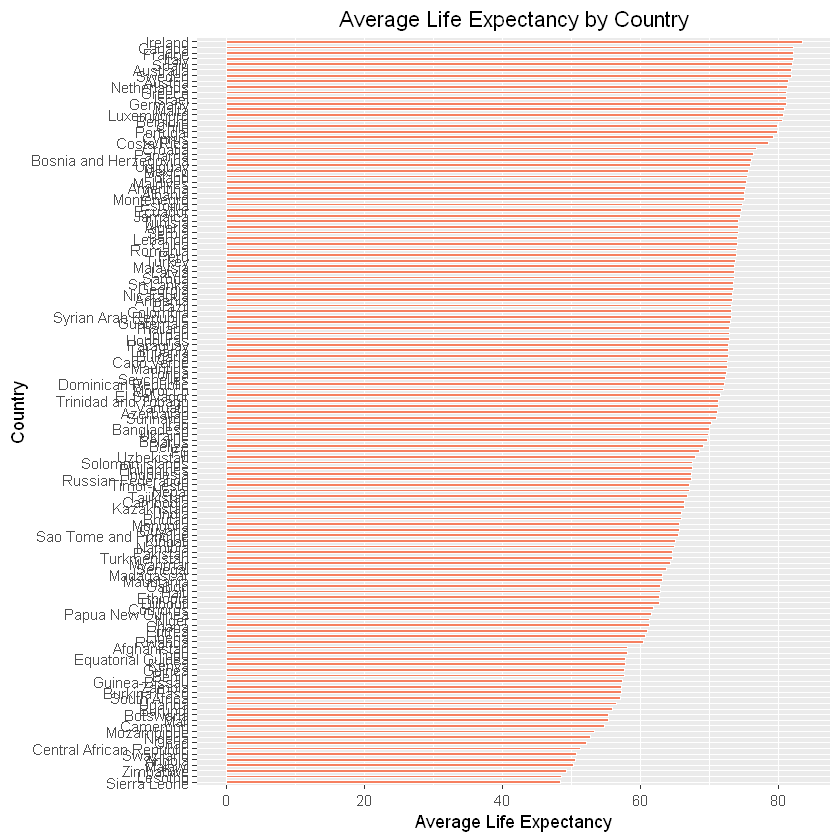

In [93]:
ggplot(by_country,aes(x=Country,y=avg_lifeexp))+
    geom_bar(aes(reorder(Country,avg_lifeexp),avg_lifeexp),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Life Expectancy')+
    ggtitle("Average Life Expectancy by Country")+
    theme(plot.title = element_text(hjust = 0.5))

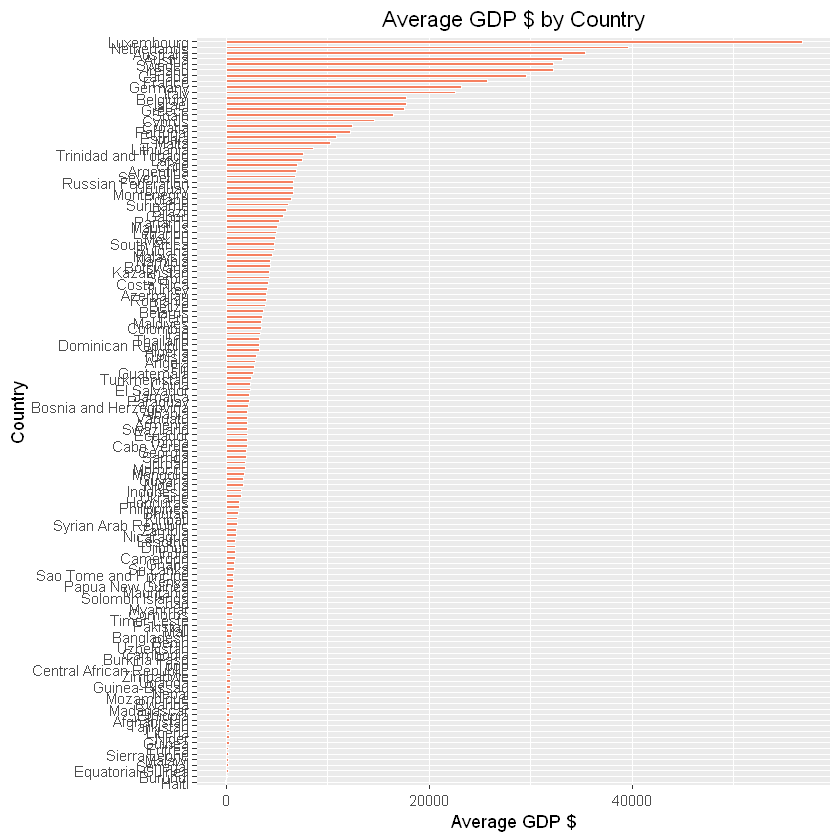

In [94]:
ggplot(by_country,aes(x=Country,y=avg_GDP))+
    geom_bar(aes(reorder(Country,avg_GDP),avg_GDP),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average GDP $')+
    ggtitle("Average GDP $ by Country")+
    theme(plot.title = element_text(hjust = 0.5))

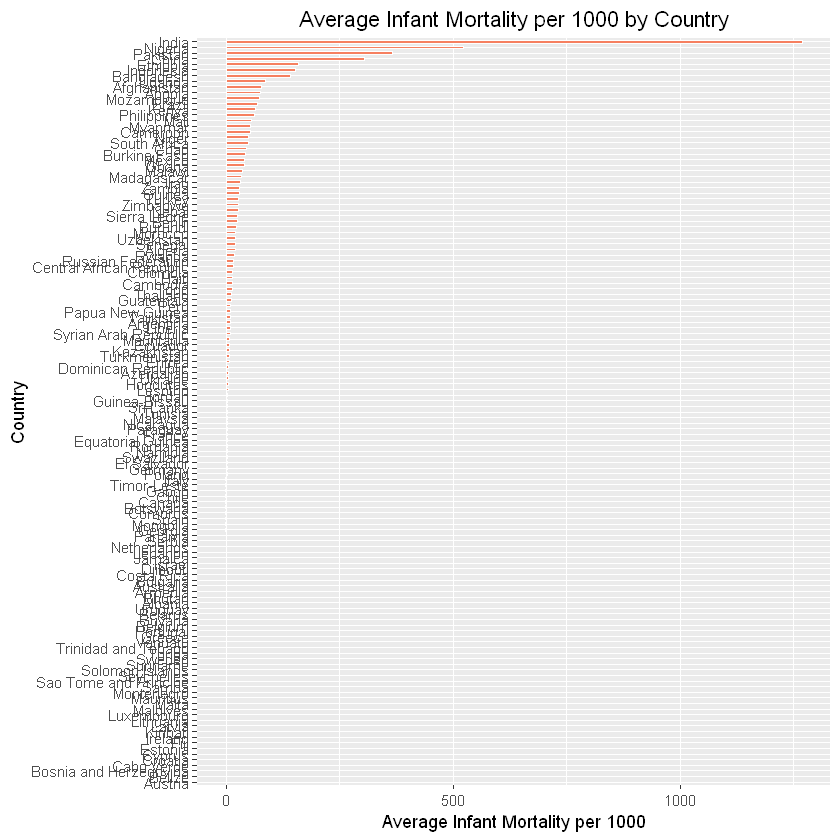

In [95]:
ggplot(by_country,aes(x=Country,y=avg_infmort))+
    geom_bar(aes(reorder(Country,avg_infmort),avg_infmort),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Infant Mortality per 1000')+
    ggtitle("Average Infant Mortality per 1000 by Country")+
    theme(plot.title = element_text(hjust = 0.5))
#Some issues with India data

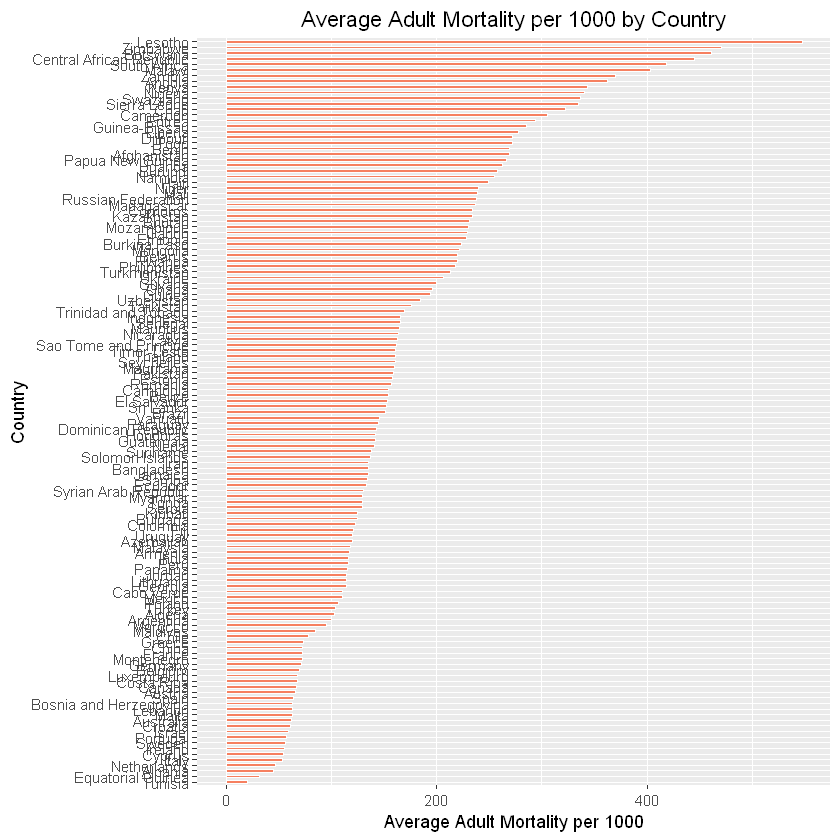

In [96]:
ggplot(by_country,aes(x=Country,y=avg_admort))+
    geom_bar(aes(reorder(Country,avg_admort),avg_admort),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Adult Mortality per 1000')+
    ggtitle("Average Adult Mortality per 1000 by Country")+
    theme(plot.title = element_text(hjust = 0.5))
#Some issues with India data

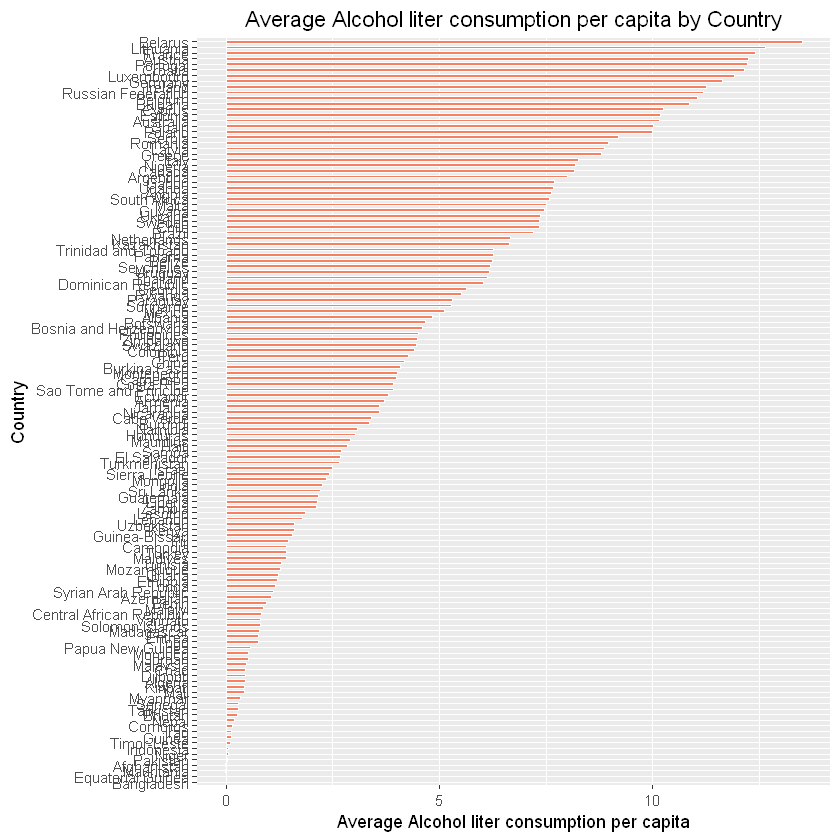

In [97]:
ggplot(by_country,aes(x=Country,y=avg_Alcohol))+
    geom_bar(aes(reorder(Country,avg_Alcohol),avg_Alcohol),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Alcohol liter consumption per capita')+
    ggtitle("Average Alcohol liter consumption per capita by Country")+
    theme(plot.title = element_text(hjust = 0.5))

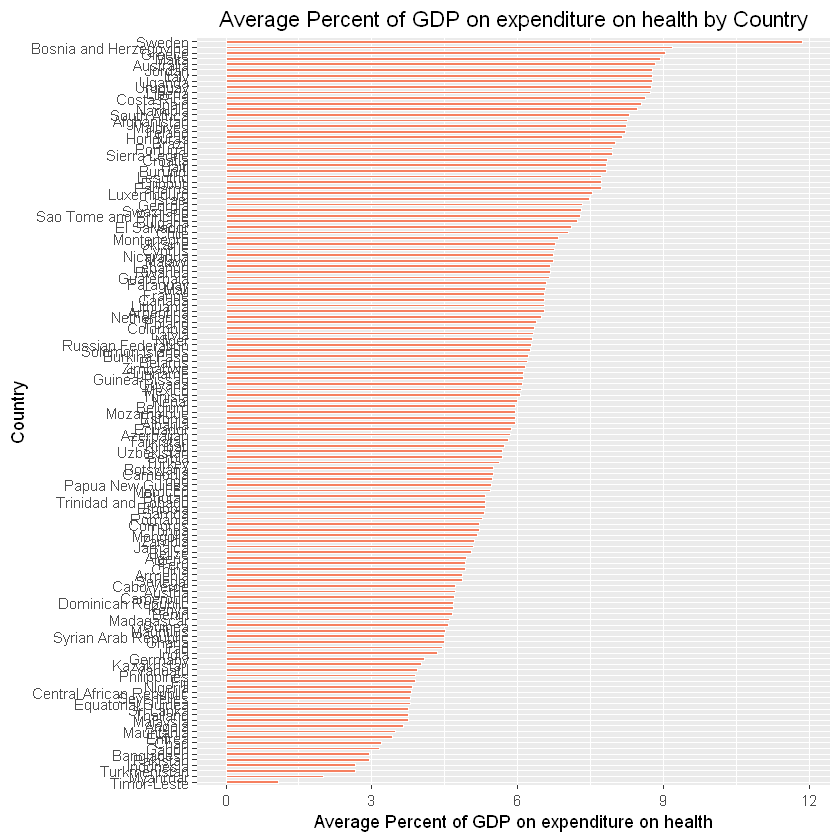

In [98]:
ggplot(by_country,aes(x=Country,y=avg_perc.exp))+
    geom_bar(aes(reorder(Country,avg_perc.exp),avg_perc.exp),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Percent of GDP on expenditure on health')+
    ggtitle("Average Percent of GDP on expenditure on health by Country")+
    theme(plot.title = element_text(hjust = 0.5))

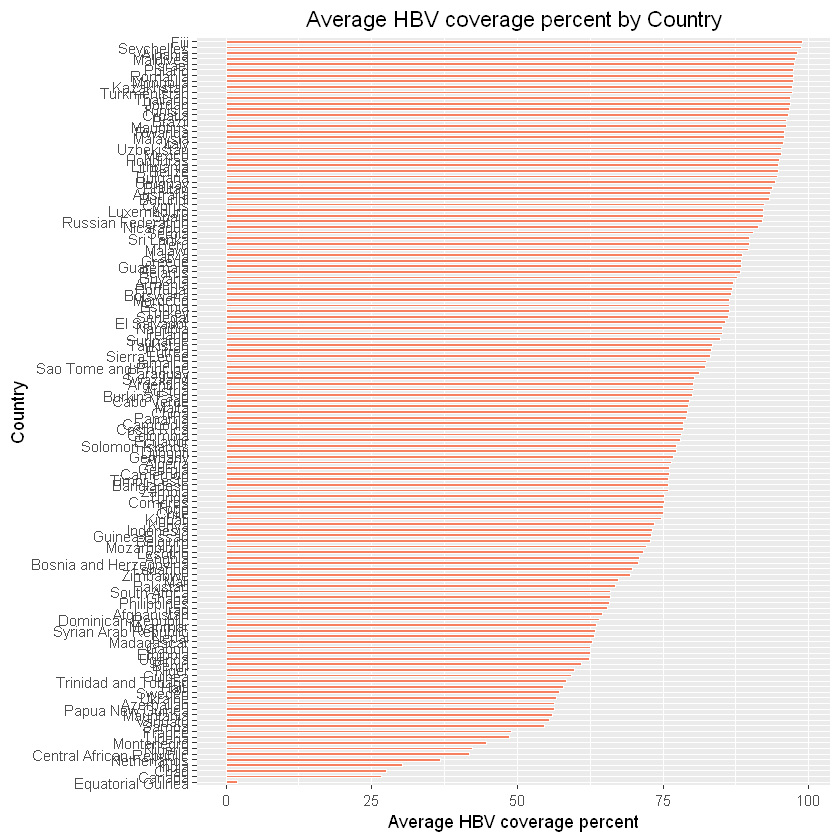

In [99]:
ggplot(by_country,aes(x=Country,y=avg_HBV))+
    geom_bar(aes(reorder(Country,avg_HBV),avg_HBV),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average HBV coverage percent')+
    ggtitle("Average HBV coverage percent by Country")+
    theme(plot.title = element_text(hjust = 0.5))

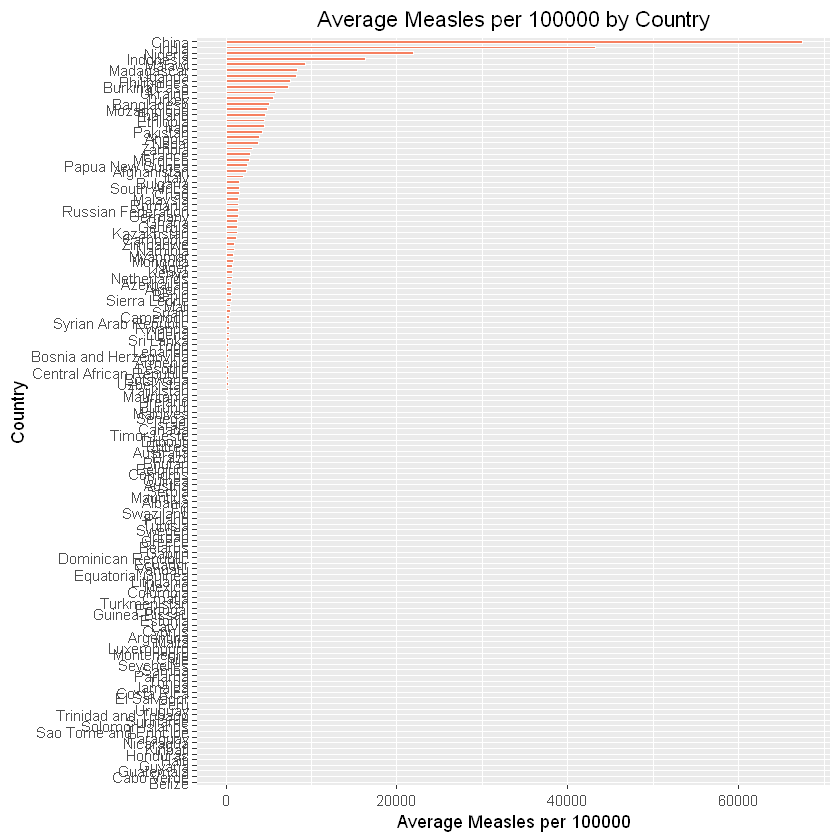

In [100]:
ggplot(by_country,aes(x=Country,y=avg_Measles))+
    geom_bar(aes(reorder(Country,avg_Measles),avg_Measles),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Measles per 100000')+
    ggtitle("Average Measles per 100000 by Country")+
    theme(plot.title = element_text(hjust = 0.5))

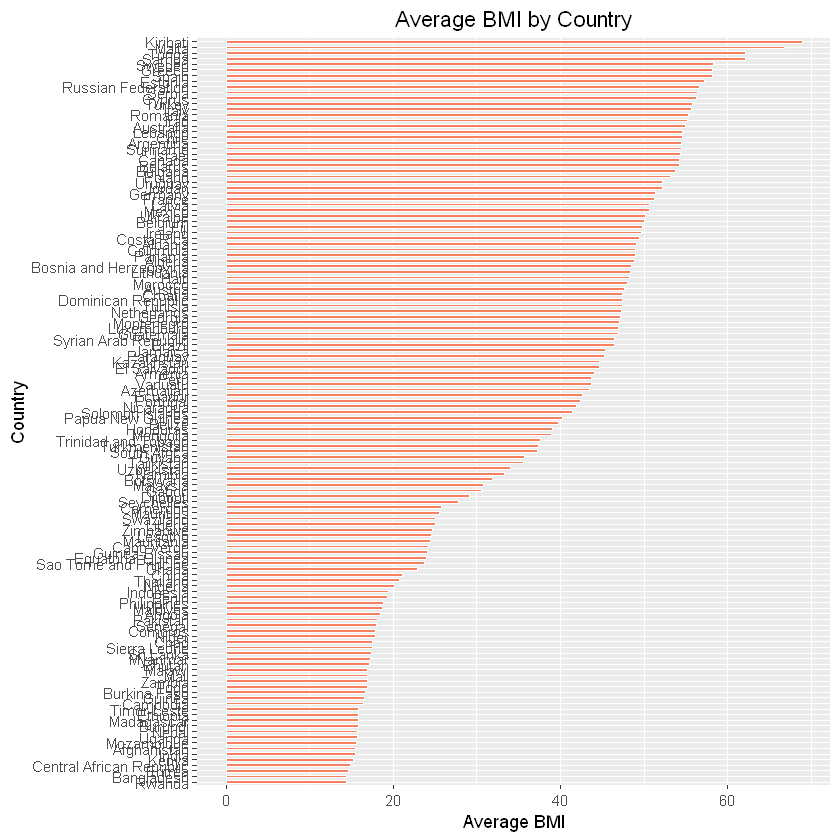

In [101]:
ggplot(by_country,aes(x=Country,y=avg_BMI))+
    geom_bar(aes(reorder(Country,avg_BMI),avg_BMI),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average BMI')+
    ggtitle("Average BMI by Country")+
    theme(plot.title = element_text(hjust = 0.5))

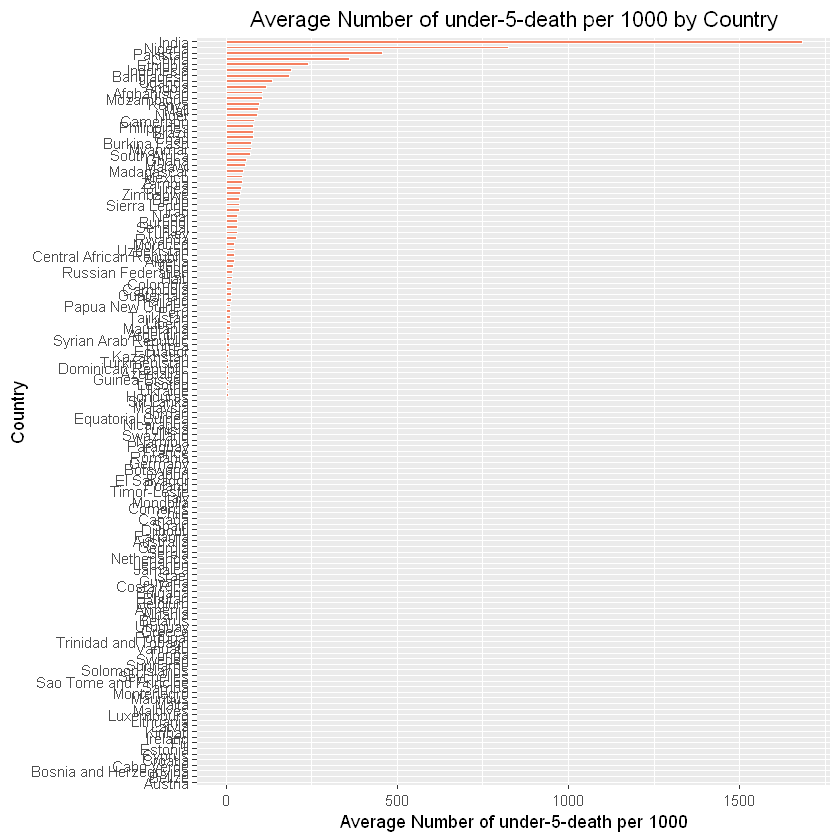

In [102]:
ggplot(by_country,aes(x=Country,y=avg_u5deaths))+
    geom_bar(aes(reorder(Country,avg_u5deaths),avg_u5deaths),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Number of under-5-death per 1000')+
    ggtitle("Average Number of under-5-death per 1000 by Country")+
    theme(plot.title = element_text(hjust = 0.5))
#Some issues with India data

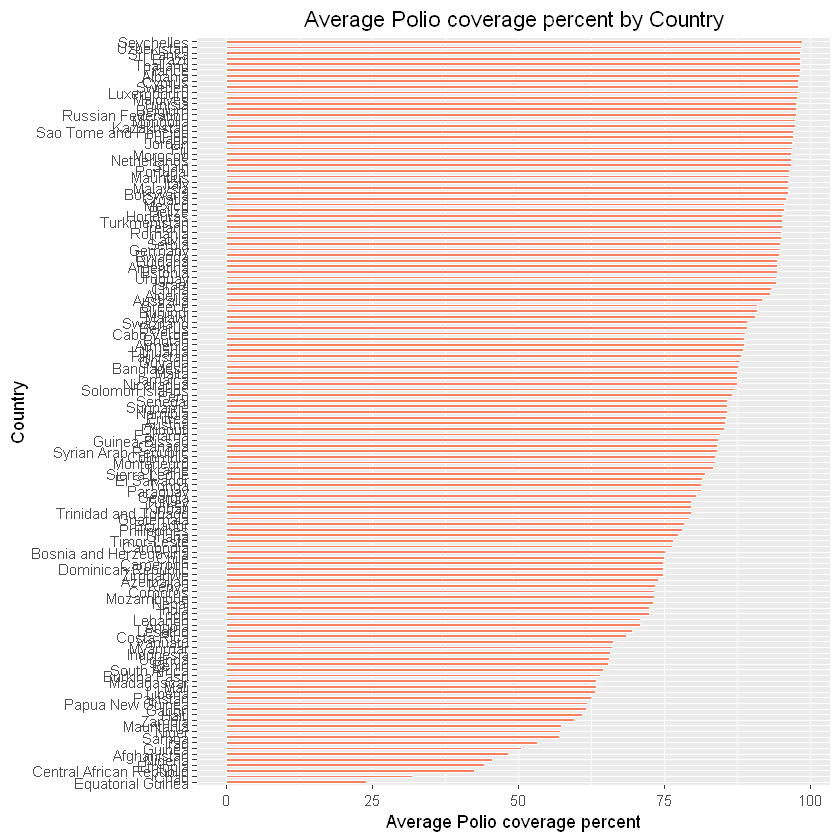

In [103]:
ggplot(by_country,aes(x=Country,y=avg_Polio))+
    geom_bar(aes(reorder(Country,avg_Polio),avg_Polio),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Polio coverage percent')+
    ggtitle("Average Polio coverage percent by Country")+
    theme(plot.title = element_text(hjust = 0.5))

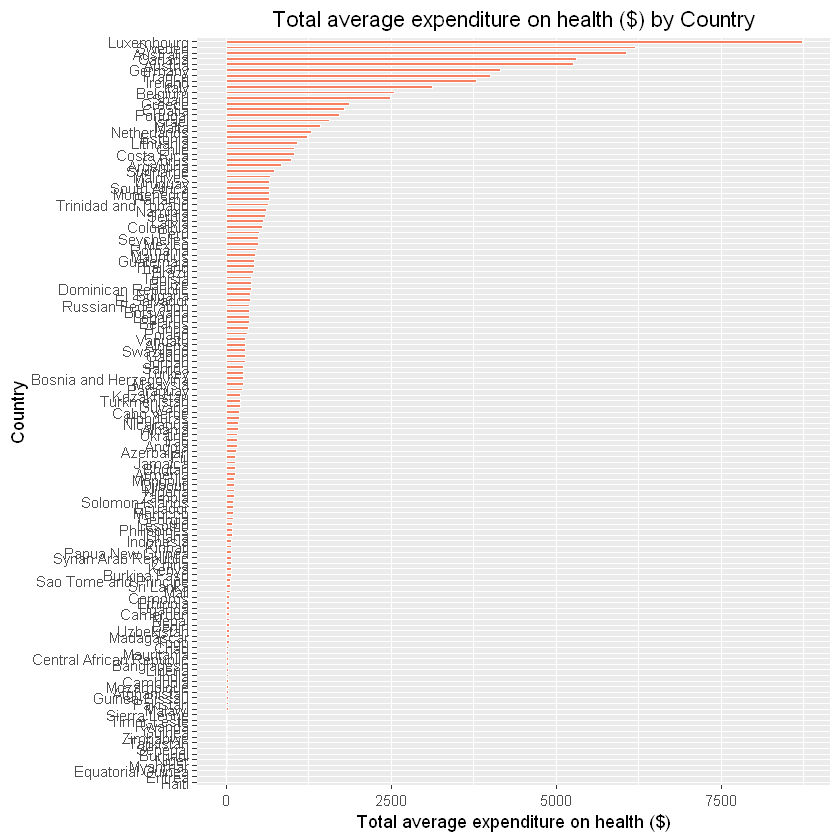

In [104]:
ggplot(by_country,aes(x=Country,y=avg_totexp))+
    geom_bar(aes(reorder(Country,avg_totexp),avg_totexp),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Total average expenditure on health ($)')+
    ggtitle("Total average expenditure on health ($) by Country")+
    theme(plot.title = element_text(hjust = 0.5))

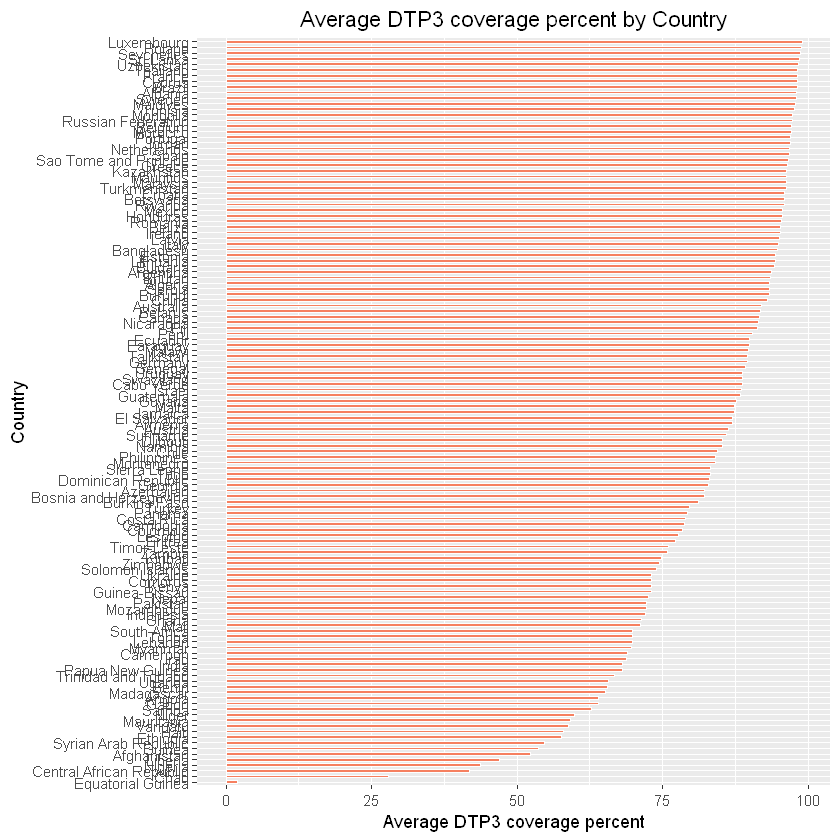

In [105]:
ggplot(by_country,aes(x=Country,y=avg_Diphtheria))+
    geom_bar(aes(reorder(Country,avg_Diphtheria),avg_Diphtheria),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average DTP3 coverage percent')+
    ggtitle("Average DTP3 coverage percent by Country")+
    theme(plot.title = element_text(hjust = 0.5))

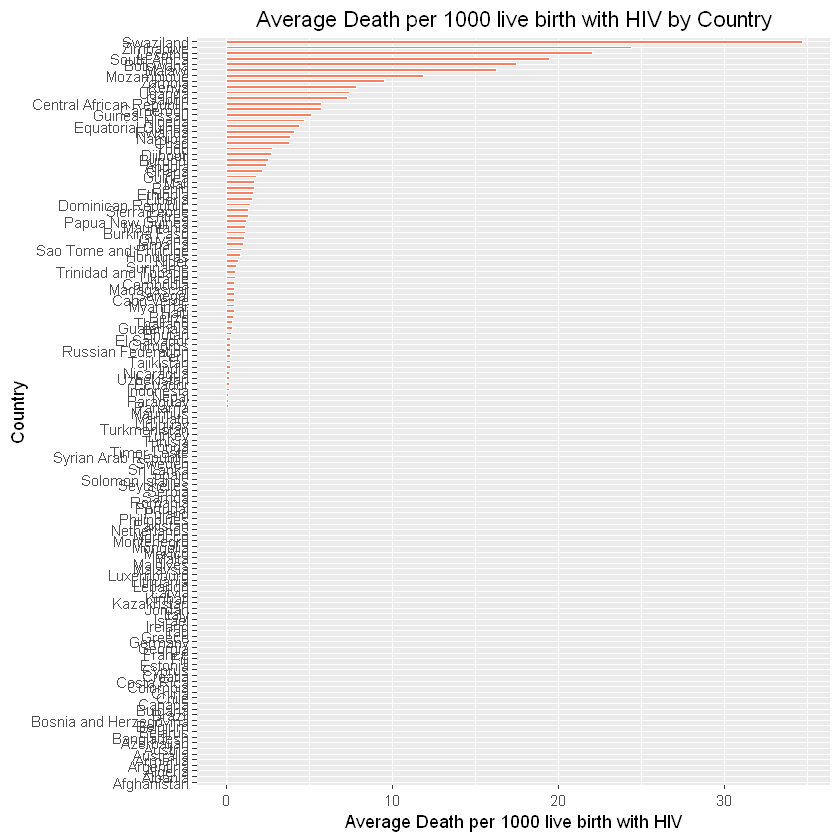

In [106]:
ggplot(by_country,aes(x=Country,y=avg_HIV))+
    geom_bar(aes(reorder(Country,avg_HIV),avg_HIV),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Death per 1000 live birth with HIV')+
    ggtitle("Average Death per 1000 live birth with HIV by Country")+
    theme(plot.title = element_text(hjust = 0.5))

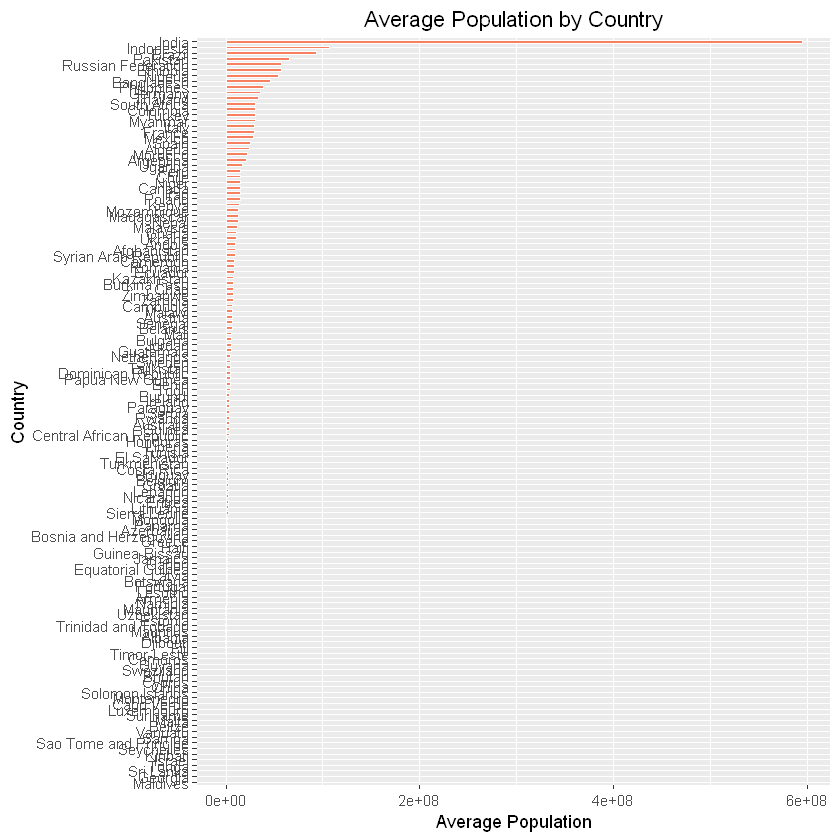

In [107]:
ggplot(by_country,aes(x=Country,y=avg_Population))+
    geom_bar(aes(reorder(Country,avg_Population),avg_Population),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Population')+
    ggtitle("Average Population by Country")+
    theme(plot.title = element_text(hjust = 0.5))
#We can identify the false reported data from China

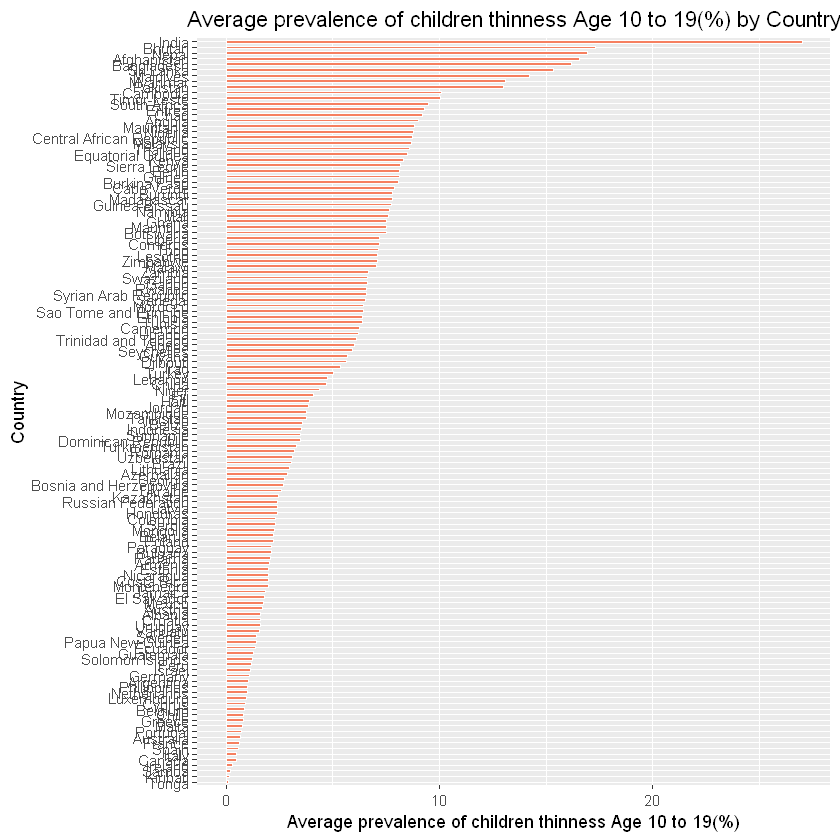

In [108]:
ggplot(by_country,aes(x=Country,y=avg_thinness..1.19.years))+
    geom_bar(aes(reorder(Country,avg_thinness..1.19.years),avg_thinness..1.19.years),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average prevalence of children thinness Age 10 to 19(%)')+
    ggtitle("Average prevalence of children thinness Age 10 to 19(%) by Country")+
    theme(plot.title = element_text(hjust = 0.5))

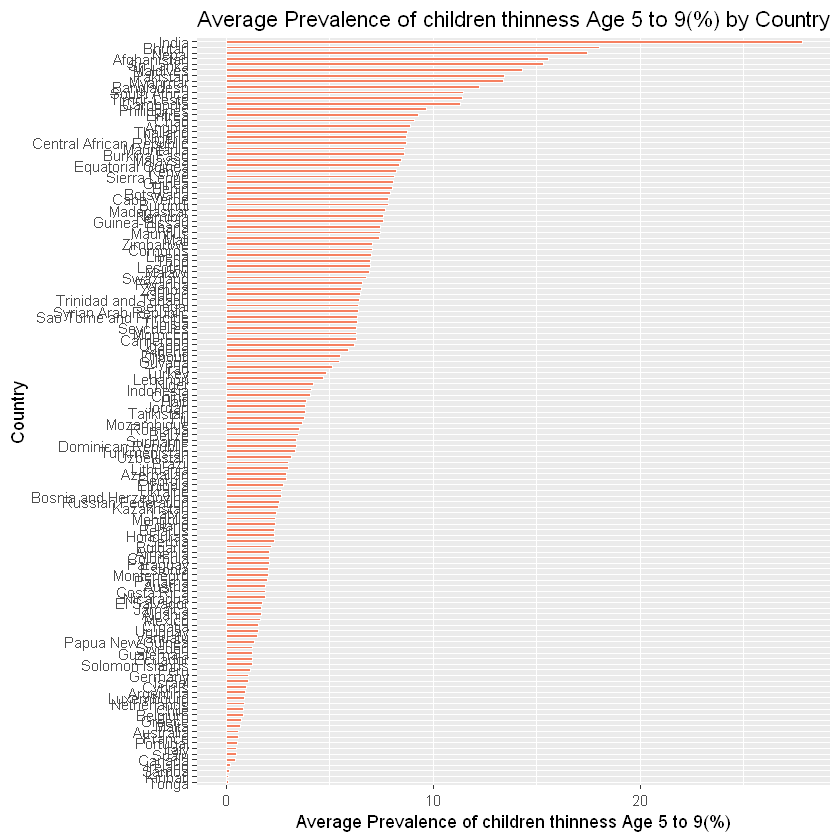

In [109]:
ggplot(by_country,aes(x=Country,y=avg_thinness.5.9.years))+
    geom_bar(aes(reorder(Country,avg_thinness.5.9.years),avg_thinness.5.9.years),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Prevalence of children thinness Age 5 to 9(%)')+
    ggtitle("Average Prevalence of children thinness Age 5 to 9(%) by Country")+
    theme(plot.title = element_text(hjust = 0.5))

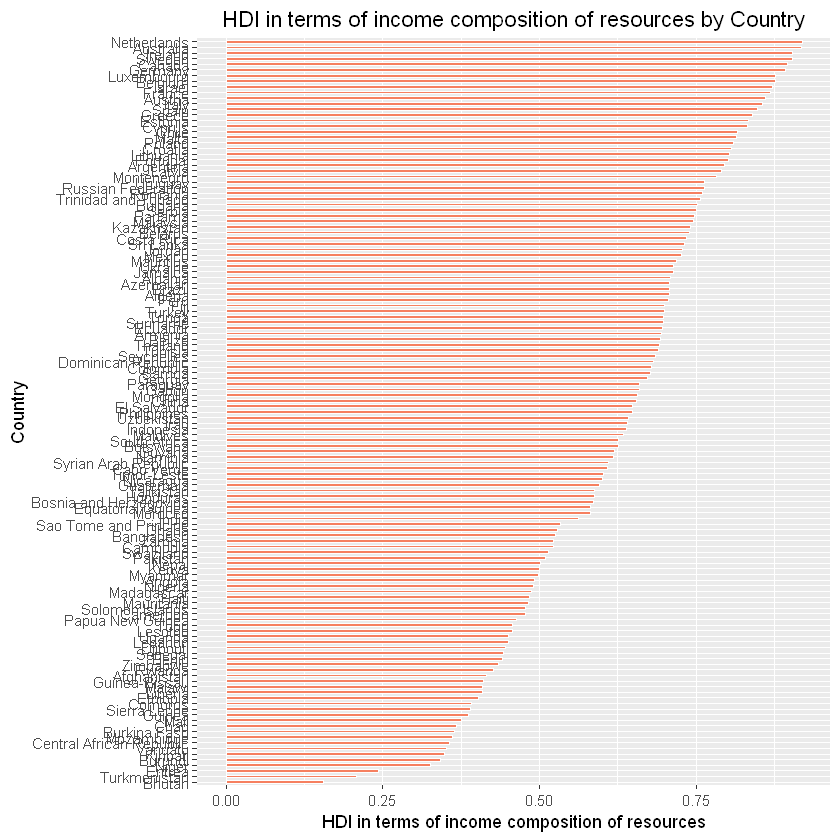

In [110]:
ggplot(by_country,aes(x=Country,y=avg_Income.composition.of.resources))+
    geom_bar(aes(reorder(Country,avg_Income.composition.of.resources),avg_Income.composition.of.resources),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('HDI in terms of income composition of resources')+
    ggtitle("HDI in terms of income composition of resources by Country")+
    theme(plot.title = element_text(hjust = 0.5))

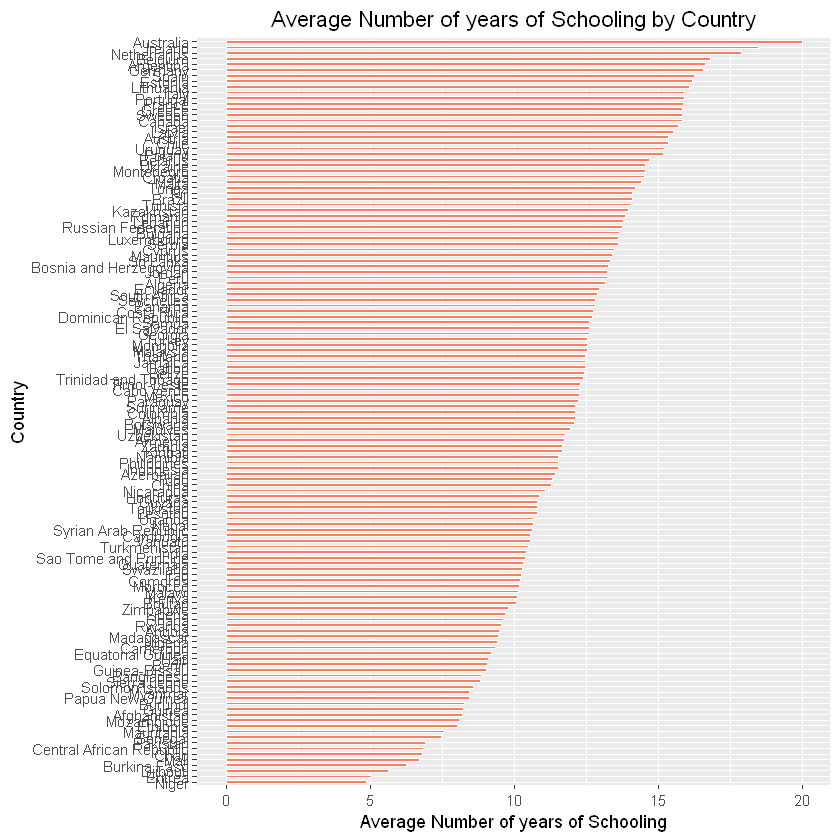

In [111]:
ggplot(by_country,aes(x=Country,y=avg_Schooling))+
    geom_bar(aes(reorder(Country,avg_Schooling),avg_Schooling),stat="identity", colour="white", fill="#f68060", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Number of years of Schooling')+
    ggtitle("Average Number of years of Schooling by Country")+
    theme(plot.title = element_text(hjust = 0.5))

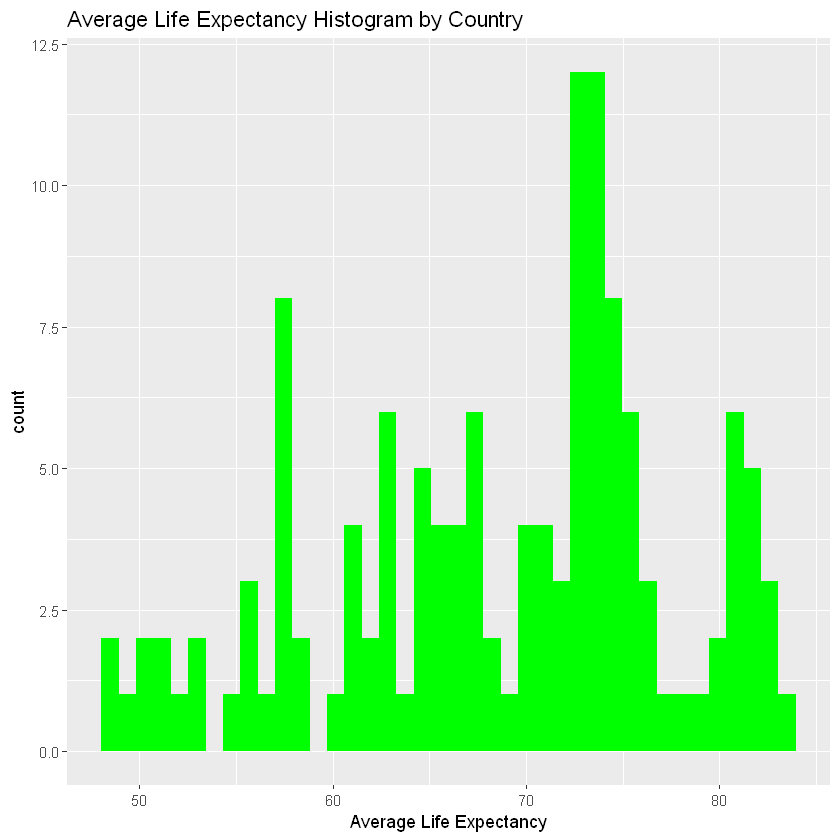

In [112]:
ggplot(by_country,aes(x=avg_lifeexp))+geom_histogram(bins=40,fill="green")+
    ggtitle("Average Life Expectancy Histogram by Country")+xlab("Average Life Expectancy")

In [113]:
by_year<-data %>% 
    group_by(Year) %>% 
    summarize(Count = n(),
             avg_lifeexp = mean(lifeexp, na.rm=TRUE))
by_year

`summarise()` ungrouping output (override with `.groups` argument)


Year,Count,avg_lifeexp
2000,61,70.20000
2001,66,70.25758
2002,81,68.58395
2003,95,68.34421
2004,103,68.43398
2005,110,68.47273
2006,114,68.90439
2007,120,68.67417
2008,123,68.66667
2009,126,68.77937


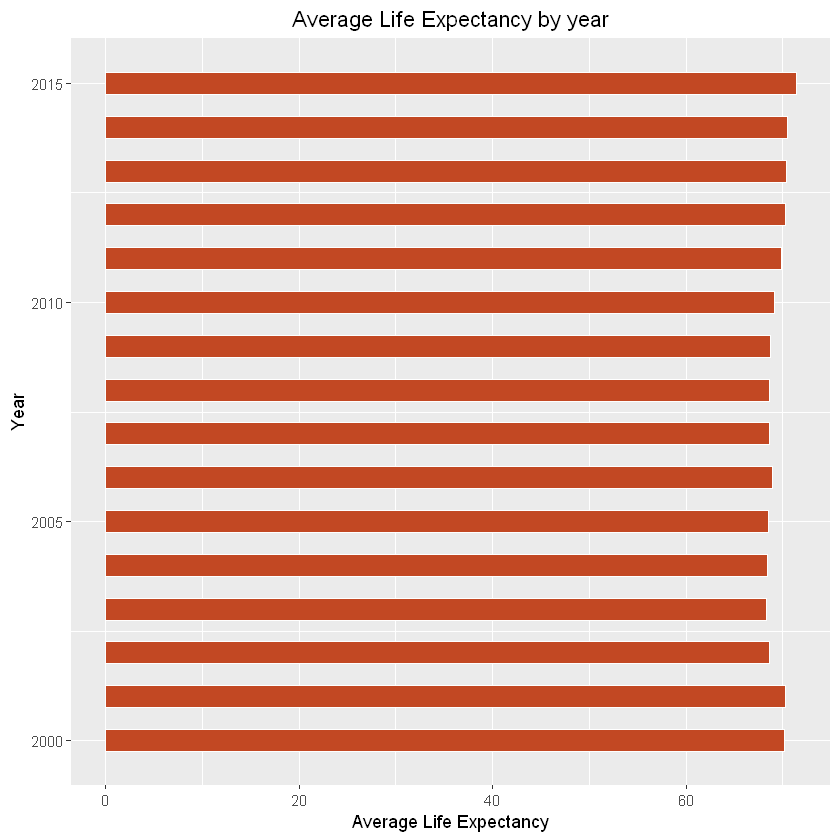

In [114]:
ggplot(by_year,aes(x=Year,y=avg_lifeexp))+
    geom_bar(stat="identity", colour="white", fill="#c24823", alpha=1, width=.5)+
    coord_flip()+
    ylab('Average Life Expectancy')+
    xlab('Year')+
    ggtitle("Average Life Expectancy by year")+
    theme(plot.title = element_text(hjust = 0.5))

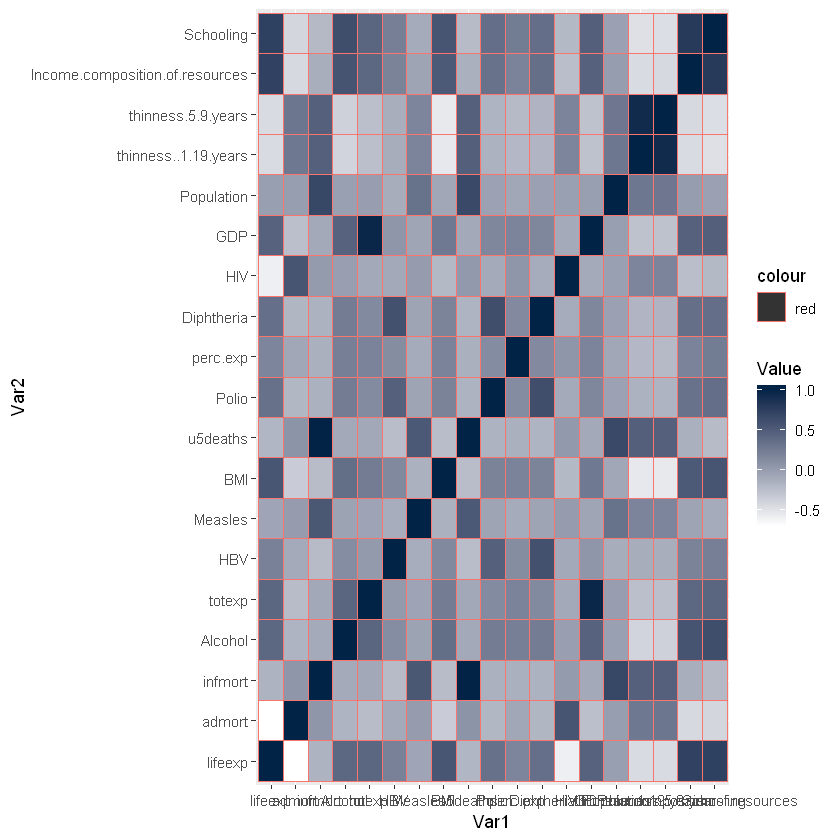

In [115]:
#correlation among all data
cordata2 <- data %>%
    drop_na() %>% 
    select(lifeexp,admort, infmort, Alcohol, totexp, HBV, Measles, BMI, u5deaths, Polio, perc.exp, Diphtheria, HIV, GDP, Population, thinness..1.19.years, thinness.5.9.years, Income.composition.of.resources, Schooling)
cormat <- cor(cordata2)
melted <- melt(cormat)
ggplot(melted)+
    geom_tile(aes(Var1, Var2, fill=value,color="red"))+
    scale_fill_gradient(name = "Value",
                      low = "#FFFFFF",
                      high = "#012345")
    

In [116]:
#Check some variables with visually high correlation with Life expectancy

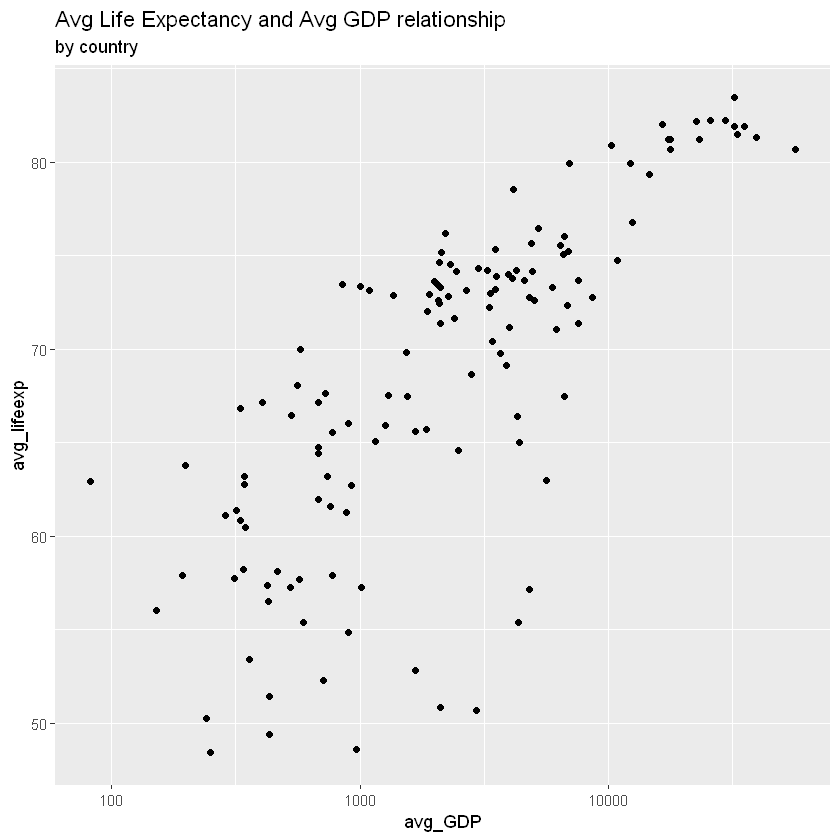

In [117]:
ggplot(by_country,aes(x=avg_GDP,y=avg_lifeexp))+geom_point()+scale_x_log10()+
ggtitle("Avg Life Expectancy and Avg GDP relationship",subtitle="by country")

In [118]:
#correlation b/w avglifeexp and avgGDP
cor(by_country$avg_lifeexp, by_country$avg_GDP)

[1] 0.5956979

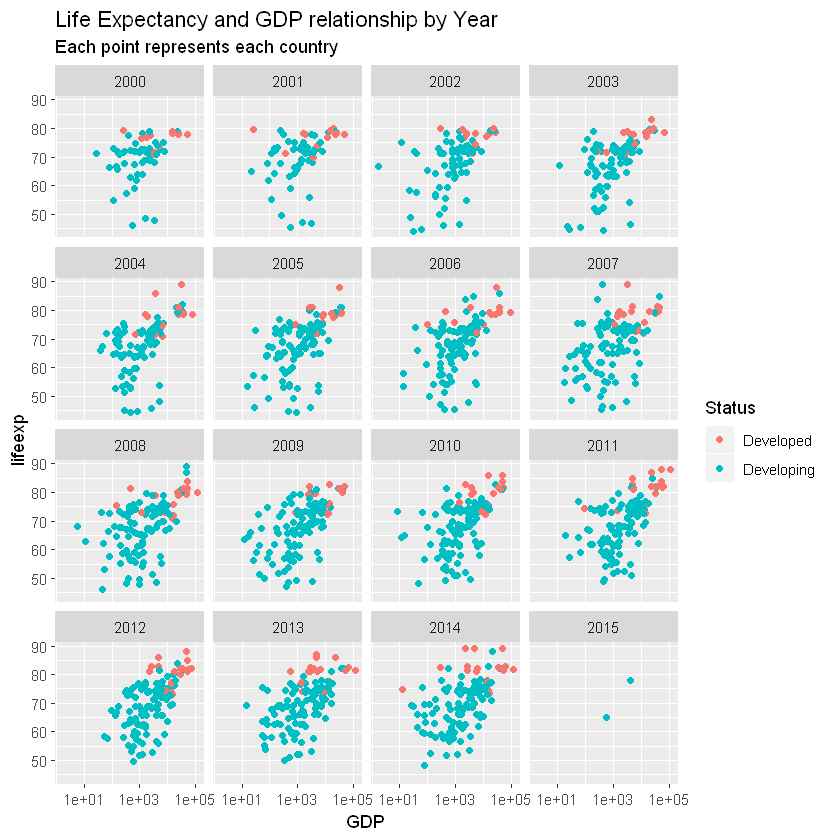

In [119]:
ggplot(data,aes(x=GDP,y=lifeexp,color=Status))+facet_wrap(~Year)+geom_point()+scale_x_log10()+
    ggtitle("Life Expectancy and GDP relationship by Year",subtitle="Each point represents each country")

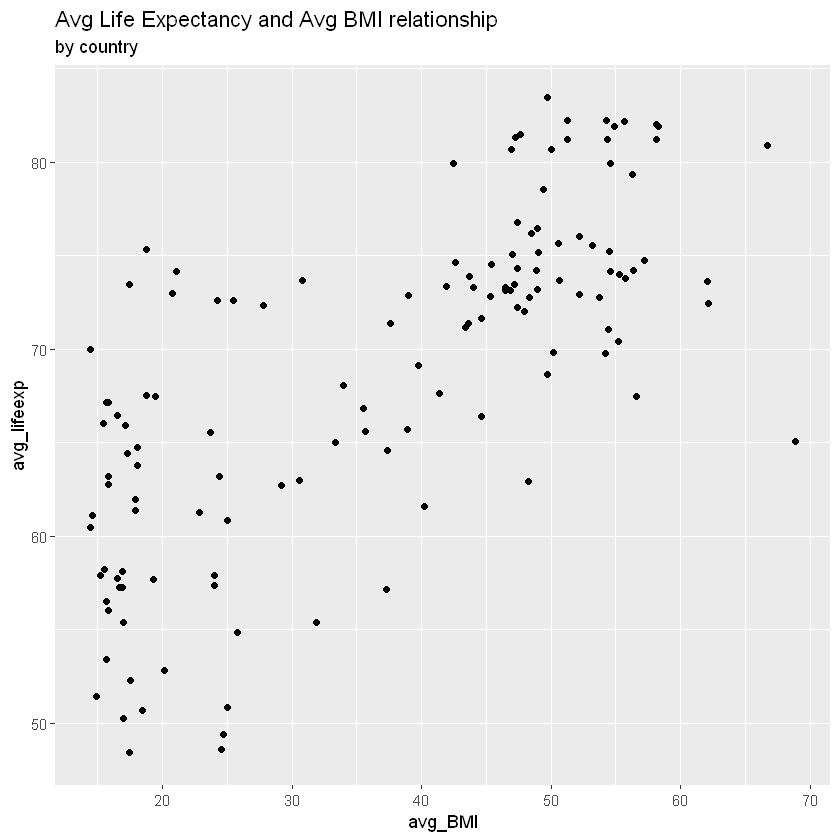

In [120]:
ggplot(by_country,aes(x=avg_BMI,y=avg_lifeexp))+geom_point()+
ggtitle("Avg Life Expectancy and Avg BMI relationship",subtitle="by country")

In [121]:
cor(by_country$avg_lifeexp, by_country$avg_BMI)

[1] 0.7281186

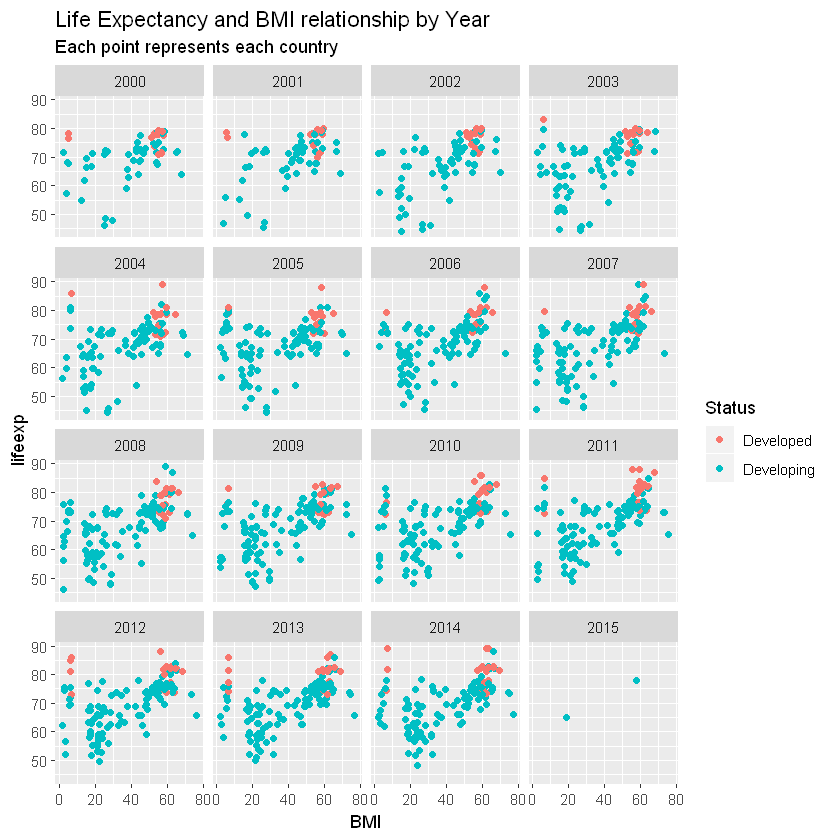

In [122]:
ggplot(data,aes(x=BMI,y=lifeexp,color=Status))+facet_wrap(~Year)+geom_point()+
    ggtitle("Life Expectancy and BMI relationship by Year",subtitle="Each point represents each country")

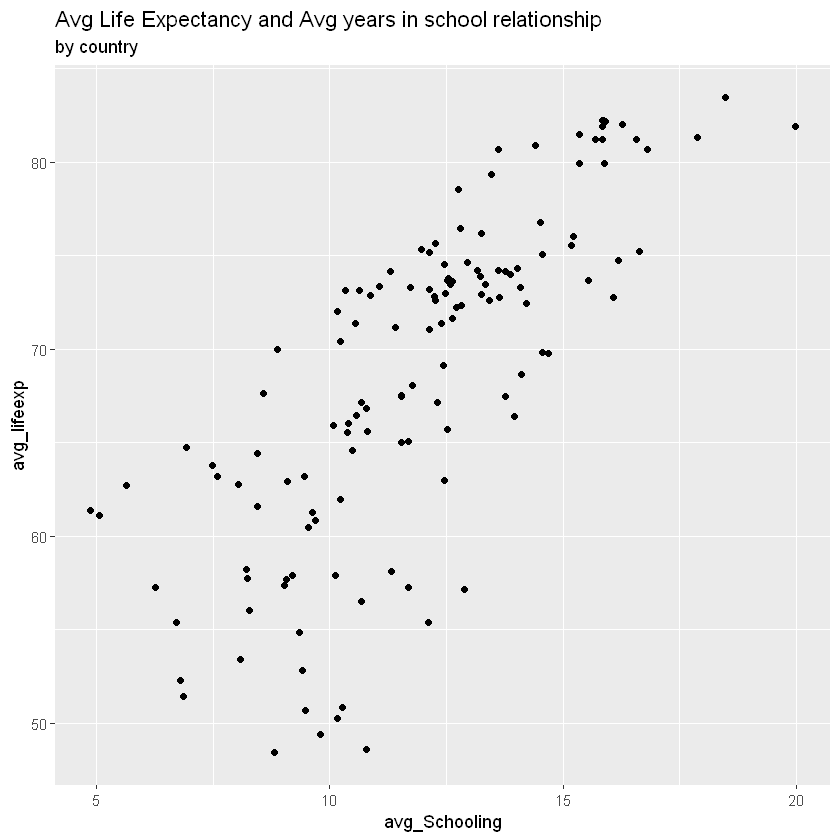

In [123]:
ggplot(by_country,aes(x=avg_Schooling,y=avg_lifeexp))+geom_point()+
ggtitle("Avg Life Expectancy and Avg years in school relationship",subtitle="by country")

In [124]:
cor(by_country$avg_lifeexp, by_country$avg_Schooling)

[1] 0.7656358

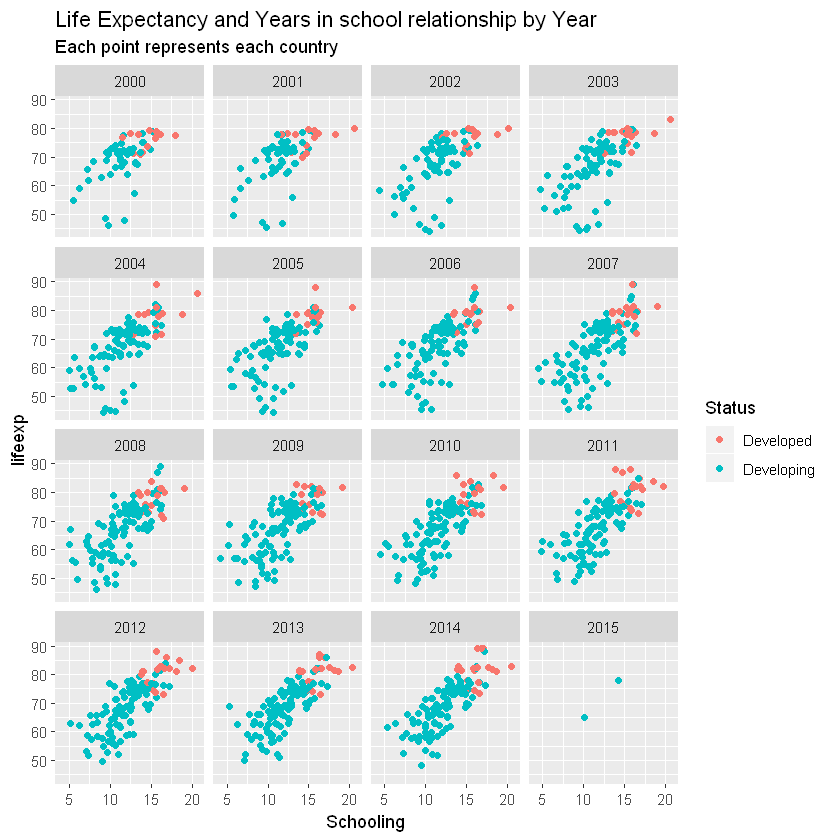

In [125]:
ggplot(data,aes(x=Schooling,y=lifeexp,color=Status))+facet_wrap(~Year)+geom_point()+
    ggtitle("Life Expectancy and Years in school relationship by Year",subtitle="Each point represents each country")

In [126]:
colnames(by_country)

[1] "Country"                             "avg_GDP"                            
 [3] "avg_lifeexp"                         "avg_infmort"                        
 [5] "avg_admort"                          "avg_Alcohol"                        
 [7] "avg_perc.exp"                        "avg_HBV"                            
 [9] "avg_Measles"                         "avg_BMI"                            
[11] "avg_u5deaths"                        "avg_Polio"                          
[13] "avg_totexp"                          "avg_Diphtheria"                     
[15] "avg_HIV"                             "avg_Population"                     
[17] "avg_thinness..1.19.years"            "avg_thinness.5.9.years"             
[19] "avg_Income.composition.of.resources" "avg_Schooling"

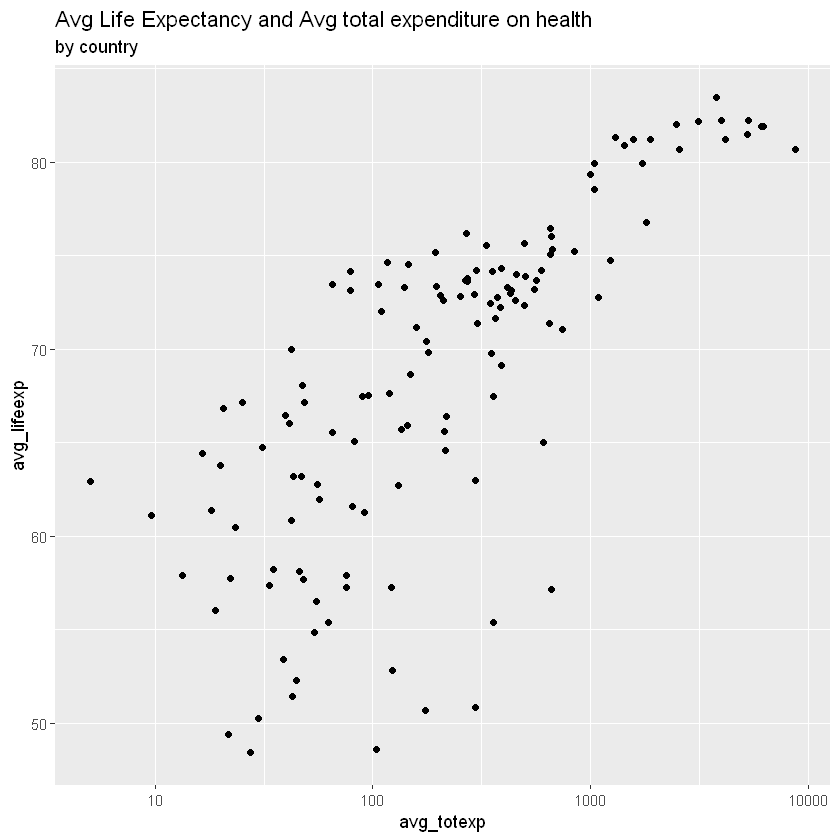

In [127]:
ggplot(by_country,aes(x=avg_totexp,y=avg_lifeexp))+geom_point()+scale_x_log10()+
ggtitle("Avg Life Expectancy and Avg total expenditure on health",subtitle="by country")

In [128]:
cor(by_country$avg_lifeexp, by_country$avg_totexp)

[1] 0.5457515

Warning message:
"Transformation introduced infinite values in continuous x-axis"

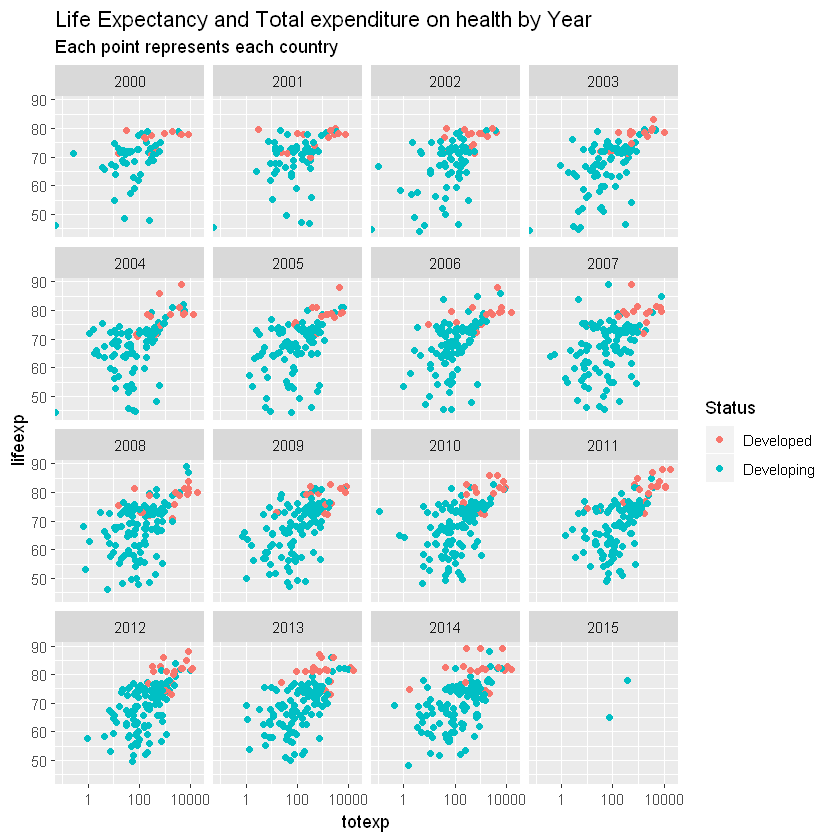

In [129]:
ggplot(data,aes(x=totexp,y=lifeexp,color=Status))+facet_wrap(~Year)+geom_point()+scale_x_log10()+
    ggtitle("Life Expectancy and Total expenditure on health by Year",subtitle="Each point represents each country")

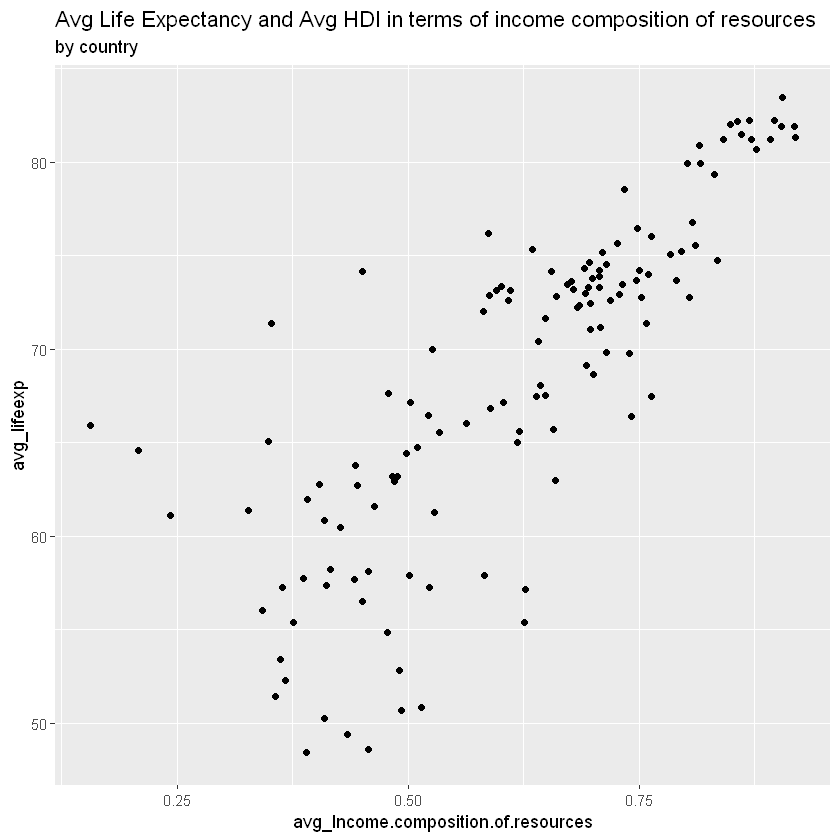

In [130]:

ggplot(by_country,aes(x=avg_Income.composition.of.resources,y=avg_lifeexp))+geom_point()+
ggtitle("Avg Life Expectancy and Avg HDI in terms of income composition of resources",subtitle="by country")

In [131]:
cor(by_country$avg_lifeexp, by_country$avg_Income.composition.of.resources)

[1] 0.8095997

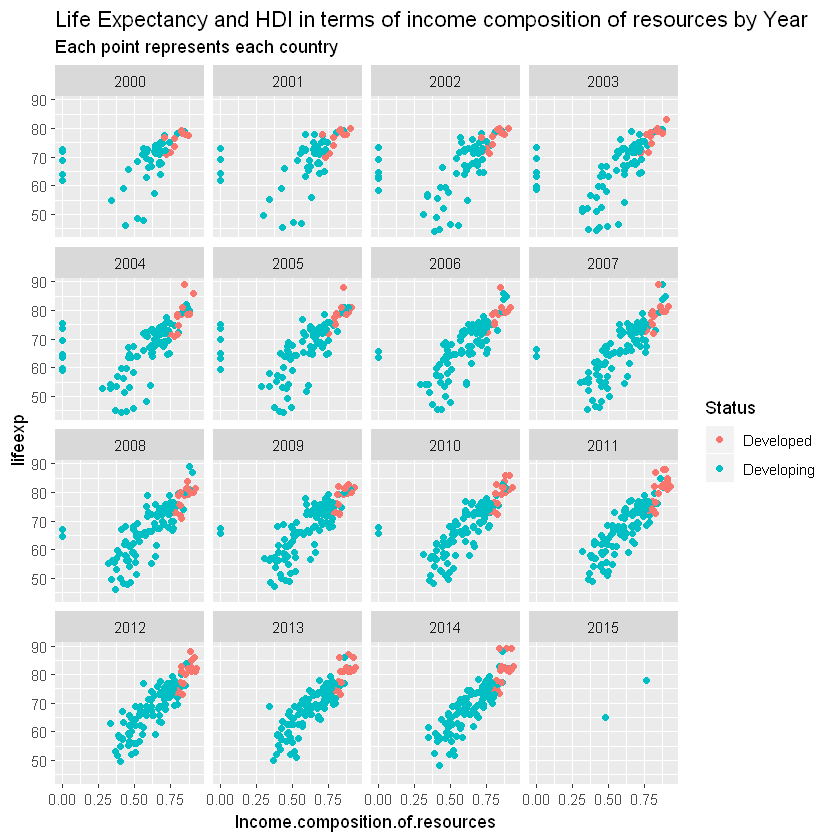

In [132]:
ggplot(data,aes(x=Income.composition.of.resources,y=lifeexp,color=Status))+facet_wrap(~Year)+geom_point()+
    ggtitle("Life Expectancy and HDI in terms of income composition of resources by Year",subtitle="Each point represents each country")

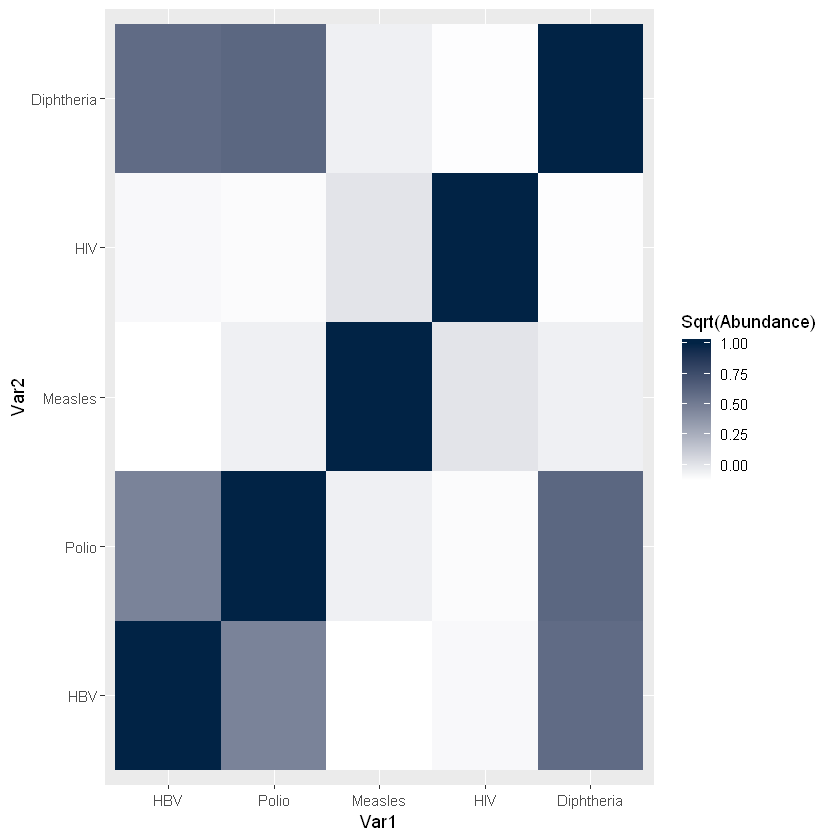

In [133]:
#correlation between vaccinations
cordata <- data %>%
    drop_na() %>% 
    select(HBV, Polio, Measles, HIV, Diphtheria)
cormat <- cor(cordata)
melted <- melt(cormat)
ggplot(melted)+
    geom_tile(aes(Var1, Var2, fill=value))+
    scale_fill_gradient(name = "Sqrt(Abundance)",
                      low = "#FFFFFF",
                      high = "#012345")